In [1]:
from scipy import io
import GPy
import numpy as np
import matplotlib.pyplot as plt
import pylab as pb


In [2]:
def plot_2outputs(m,xlim,x_1,x_2):
    fig = pb.figure(figsize=(12,8))
    #Output 1
    ax1 = fig.add_subplot(211)
    ax1.set_xlim(xlim)
    ax1.set_title('Output 1')
    m.plot(plot_limits=xlim,fixed_inputs=[(1,0)],which_data_rows=slice(0,len(x_1)),ax=ax1)

    #Output 2
    ax2 = fig.add_subplot(212)
    ax2.set_xlim(xlim)
    ax2.set_title('Output 2')
    m.plot(plot_limits=xlim,fixed_inputs=[(1,1)],which_data_rows=slice(len(x_1),len(x_1)+len(x_2)),ax=ax2)

In [3]:
def build_XY(input_list,output_list=None):
    num_outputs = len(input_list)
    Y = np.vstack(output_list)
    I = np.hstack( [np.repeat(j,_x.shape[0]) for _x,j in zip(input_list,range(num_outputs))] )
    X = np.vstack(input_list)
    X = np.hstack([X,I[:,None]])
    I = {'output_index':I[:,None]}
    return X,Y,I

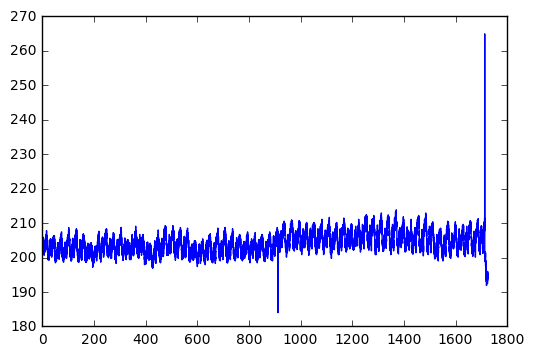

In [4]:
mat_file1 = io.loadmat('2014_Dataset1.mat')
t = mat_file1['t']
p1 = mat_file1['p1']
p2 = mat_file1['p2']
x = np.arange(0,len(p2)/10,0.1)[:,None]
plt.plot(x,p2)
plt.show()

In [5]:
K1 = GPy.kern.RBF(1)
K2 = GPy.kern.Exponential(1)
K3 = GPy.kern.Matern32(1)
K4 = GPy.kern.Matern52(1)
K5 = GPy.kern.PeriodicExponential(1)
K6 = GPy.kern.PeriodicMatern32(1)
K7 = GPy.kern.PeriodicMatern52(1)

In [5]:
i = slice(8000,9000)

In [7]:
# lcm = GPy.util.multioutput.LCM(input_dim=1,num_outputs=2,kernels_list=[K1,K7])
# mul = GPy.models.GPCoregionalizedRegression([x[i],x[i]],[p1[i],p2[i]],kernel = lcm)
# mul.optimize()

import pickle
f = open('d:/hyperparameter1_4500','rb')
mul = pickle.load(f)
f.close()

In [14]:
j = slice(9029,9129)
k = slice(9029,9119)

In [15]:
kern = mul.kern.copy()
mul2 = GPy.models.GPCoregionalizedRegression([x[j],x[k]],[p1[j],p2[k]],kernel = kern)
mul2['.*Gaussian_noise_0.variance'].constrain_fixed(mul.mixed_noise.Gaussian_noise_0.variance)
mul2['.*Gaussian_noise_1.variance'].constrain_fixed(mul.mixed_noise.Gaussian_noise_1.variance)

array([0])

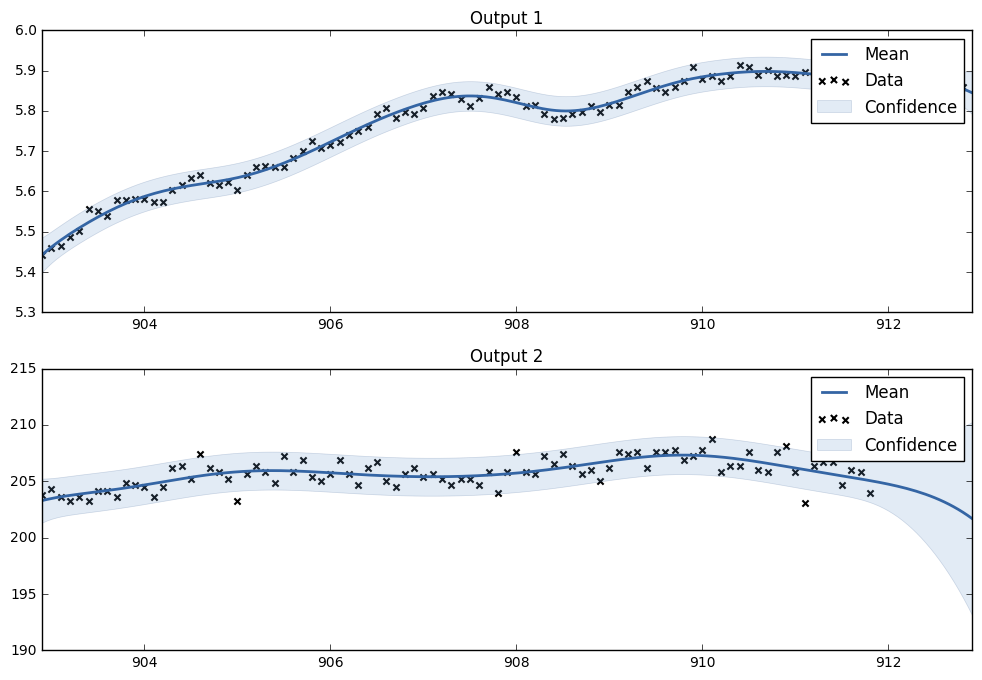

In [16]:
plot_2outputs(mul2, xlim=(x[9029],x[9129]),x_1=x[j],x_2=x[k])
plt.show()

In [16]:
mul

gp.,value,constraints,priors
sum.ICM0.rbf.variance,34.5549187208,+ve,
sum.ICM0.rbf.lengthscale,4.72475766389,+ve,
sum.ICM0.B.W,"(2, 1)",,
sum.ICM0.B.kappa,"(2,)",+ve,
sum.ICM1.periodic_Matern52.variance,1.50389286212,+ve,
sum.ICM1.periodic_Matern52.lengthscale,148.758108773,+ve,
sum.ICM1.periodic_Matern52.period,5.57476161251,+ve,
sum.ICM1.B.W,"(2, 1)",,
sum.ICM1.B.kappa,"(2,)",+ve,
mixed_noise.Gaussian_noise_0.variance,0.000906845506426,+ve,


In [17]:
lcm2 = GPy.util.multioutput.LCM(input_dim=1,num_outputs=2,kernels_list=[K1,K7])
mul2 = GPy.models.GPCoregionalizedRegression([x[i],x[j]],[p1[i],p2[j]],kernel = lcm2)

In [21]:
# mul['.*rbf.variance'].constrain_fixed(17.392982235)
# mul['.*rbf.lengthscale'].constrain_fixed(2.06147698283)
# mul['.*periodic_Matern52.variance'].constrain_fixed(0.0488964282959)
# mul['.*periodic_Matern52.lengthscale'].constrain_fixed(0.92205287449)
# mul['.*periodic_Matern52.period'].constrain_fixed(6.39980147571)
# mul['.*Gaussian_noise_0.variance'].constrain_fixed(0.0003388053545)
# mul['.*Gaussian_noise_1.variance'].constrain_fixed(0.674126080624)

mul2['.*rbf.variance'].constrain_fixed(21.0433325052)
mul2['.*rbf.lengthscale'].constrain_fixed(4.7107646968)
mul2['.*periodic_Matern52.variance'].constrain_fixed(1.31584949053)
mul2['.*periodic_Matern52.lengthscale'].constrain_fixed(20.5734613342)
mul2['.*periodic_Matern52.period'].constrain_fixed(5.57351706817)
mul2['.*Gaussian_noise_0.variance'].constrain_fixed(0.000906284069696)
mul2['.*Gaussian_noise_1.variance'].constrain_fixed(0.716752352077)
mul2['.*ICM0.B.W'].constrain_fixed(mul.sum.ICM0.B.W)
mul2['.*ICM1.B.W'].constrain_fixed(mul.sum.ICM1.B.W)
mul2['.*ICM0.B.kappa'].constrain_fixed(mul.sum.ICM0.B.kappa)
mul2['.*ICM1.B.kappa'].constrain_fixed(mul.sum.ICM1.B.kappa)

array([0, 1])

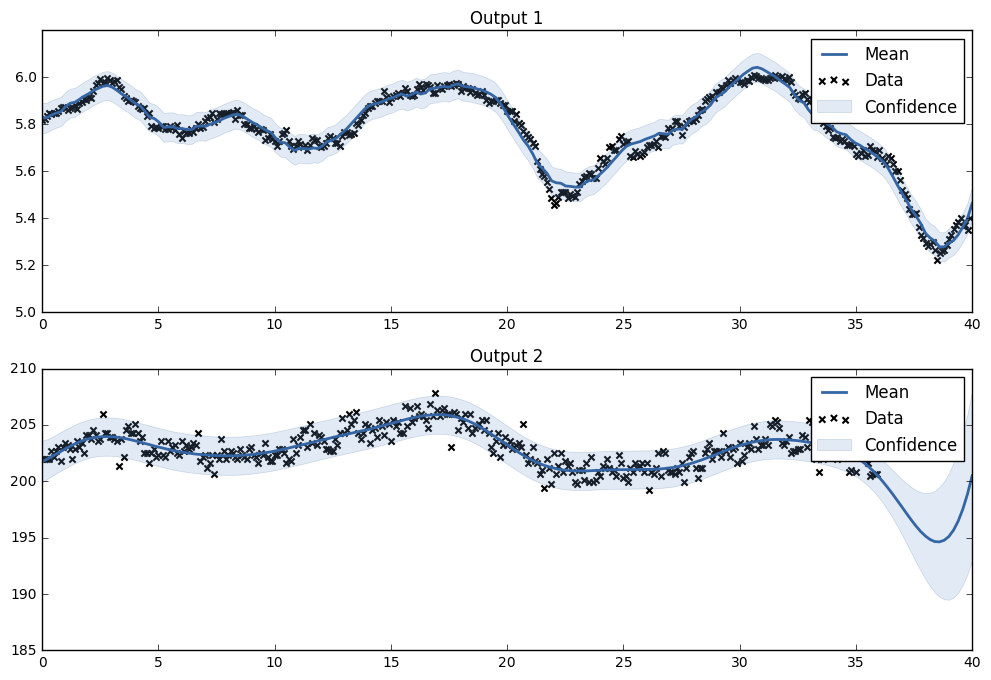

In [22]:
plot_2outputs(mul2, xlim=(x[0],x[400]),x_1=x[i],x_2=x[j])
plt.show()

In [13]:
mul2

gp.,value,constraints,priors
sum.ICM0.rbf.variance,21.0433325052,+ve fixed,
sum.ICM0.rbf.lengthscale,4.7107646968,+ve fixed,
sum.ICM0.B.W,"(2, 1)",,
sum.ICM0.B.kappa,"(2,)",+ve,
sum.ICM1.periodic_Matern52.variance,1.31584949053,+ve fixed,
sum.ICM1.periodic_Matern52.lengthscale,20.5734613342,+ve fixed,
sum.ICM1.periodic_Matern52.period,5.57351706817,+ve fixed,
sum.ICM1.B.W,"(2, 1)",,
sum.ICM1.B.kappa,"(2,)",+ve,
mixed_noise.Gaussian_noise_0.variance,0.000906284069696,+ve fixed,
